In [41]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary

In [42]:
file_path = r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\BP_data.csv'
df = pd.read_csv(file_path)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [43]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [44]:
missing_values = df.isnull().sum()

print(missing_values)

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [45]:
df = df.fillna(0)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


In [46]:
df.drop(columns = 'Patient_Number')

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


In [47]:
X = df.drop('Blood_Pressure_Abnormality', axis = 1).values
y = df['Blood_Pressure_Abnormality'].values

In [48]:
#데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 특성과 타겟 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 14), (400, 14), (1600,), (400,))

In [50]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)

In [52]:
y_train = F.one_hot(y_train, num_classes = 2)

In [53]:
# DataLoader 생성

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size = 50, shuffle = True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size = 50, shuffle = False)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600, 2]),
 torch.Size([400]))

In [55]:
# model 정의
class BloodPressureDense(nn.Module):
    def __init__(self):
        super(BloodPressureDense, self).__init__()
        self.fc1 = nn.Linear(14, 28)
        self.fc2 = nn.Linear(28, 56)
        self.fc3 = nn.Linear(56, 28)
        self.fc4 = nn.Linear(28, 14)
        self.fc5 = nn.Linear(14, 2)  # 2 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the model, loss function, and optimizer
model = BloodPressureDense()

In [59]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [61]:
# loss와 정확도 저장용 변수
train_losses = []
test_accuracies = []

# 학습 루프
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:

        labels = labels.float() # convert long type as float type
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("학습 완료.")

Epoch 1/30, Loss: 0.6909, Accuracy: 71.25%
Epoch 2/30, Loss: 0.6661, Accuracy: 70.00%
Epoch 3/30, Loss: 0.5822, Accuracy: 71.75%
Epoch 4/30, Loss: 0.5154, Accuracy: 72.50%
Epoch 5/30, Loss: 0.4899, Accuracy: 73.75%
Epoch 6/30, Loss: 0.4738, Accuracy: 73.75%
Epoch 7/30, Loss: 0.4575, Accuracy: 77.75%
Epoch 8/30, Loss: 0.4454, Accuracy: 78.50%
Epoch 9/30, Loss: 0.4303, Accuracy: 79.25%
Epoch 10/30, Loss: 0.4165, Accuracy: 81.50%
Epoch 11/30, Loss: 0.3988, Accuracy: 82.50%
Epoch 12/30, Loss: 0.3802, Accuracy: 82.00%
Epoch 13/30, Loss: 0.3559, Accuracy: 81.25%
Epoch 14/30, Loss: 0.3451, Accuracy: 84.50%
Epoch 15/30, Loss: 0.3328, Accuracy: 84.00%
Epoch 16/30, Loss: 0.3165, Accuracy: 85.75%
Epoch 17/30, Loss: 0.3082, Accuracy: 83.75%
Epoch 18/30, Loss: 0.2987, Accuracy: 85.25%
Epoch 19/30, Loss: 0.2935, Accuracy: 83.75%
Epoch 20/30, Loss: 0.2912, Accuracy: 81.50%
Epoch 21/30, Loss: 0.2821, Accuracy: 84.25%
Epoch 22/30, Loss: 0.2718, Accuracy: 83.75%
Epoch 23/30, Loss: 0.2722, Accuracy: 83.5

In [62]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[169  39]
 [ 26 166]]
F1 Score: 0.84
Precision: 0.84
Recall: 0.84
Specificity: 0.84


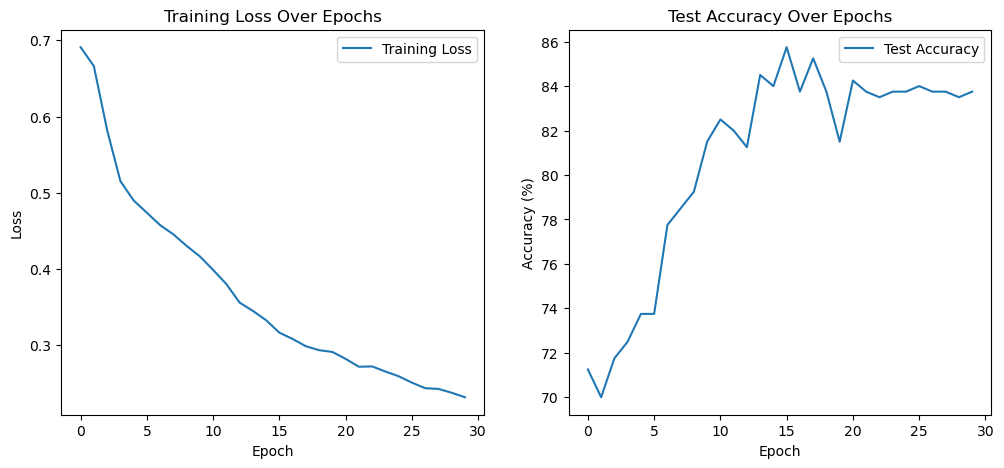

In [63]:
# Plot the loss and accuracy
plt.figure(figsize = (12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label = 'Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

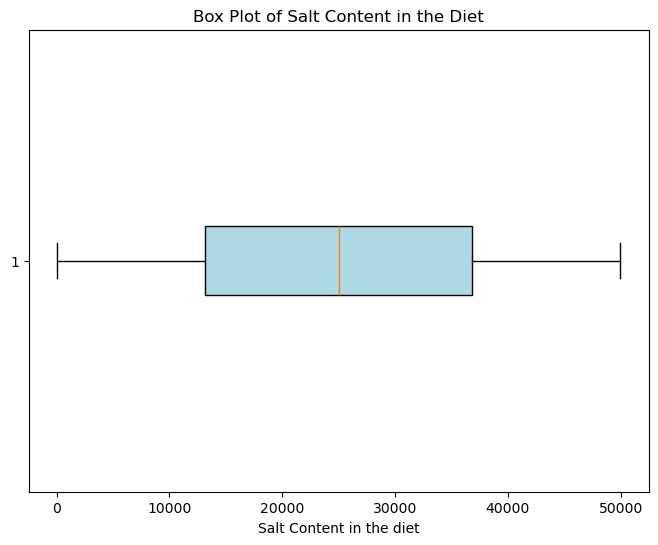

In [66]:
salt_content = df['salt_content_in_the_diet']

# box plot 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(salt_content.dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Box Plot of Salt Content in the Diet')
plt.xlabel('Salt Content in the diet')
plt.show()

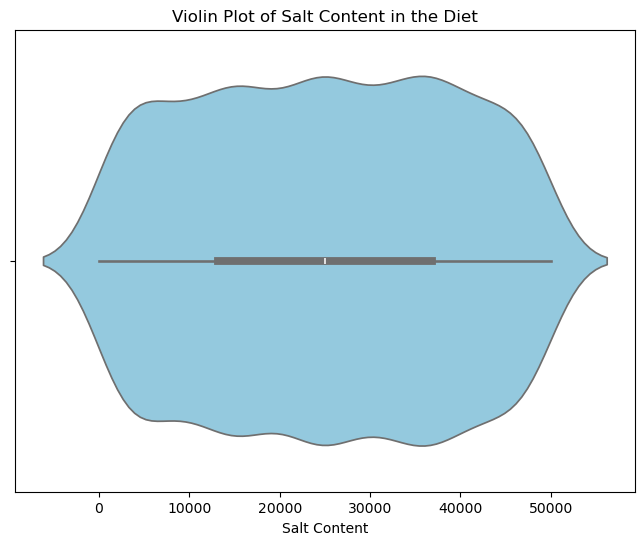

In [69]:
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.violinplot(x = df['salt_content_in_the_diet'], color="skyblue")
plt.title('Violin Plot of Salt Content in the Diet')
plt.xlabel('Salt Content')
plt.show()

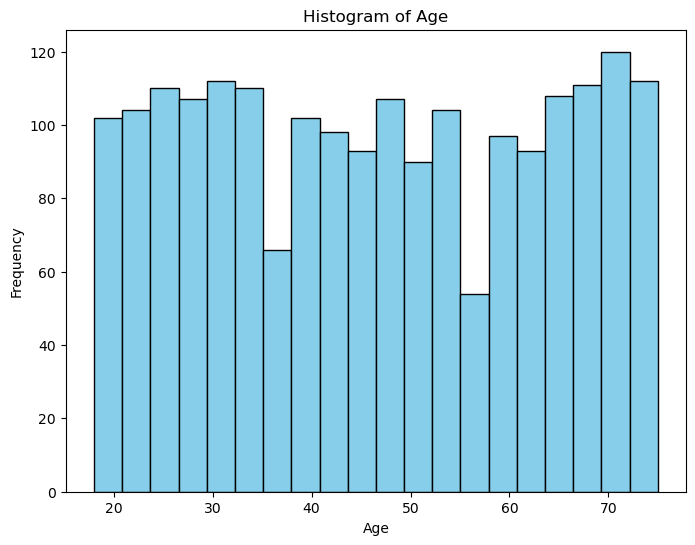

In [70]:
age_data = df['Age']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(age_data.dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()